In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
import scipy.optimize as opt

In [3]:
data = pd.read_csv (r'C:\Users\JOANA\Desktop\Project\Project\covid19Bulgaria2.csv')  
#data = pd.read_csv (r'C:\Users\JOANA\Desktop\Project\Project\covid19Bulgaria.csv')  
#print(data)
data

date  confirmed  infected  deaths  recovered  new  new deaths  \
0   12-03-2020         23        22       1          0   16           0   
1   13-03-2020         31        30       1          0    8           0   
2   14-03-2020         41        39       2          0   10           1   
3   15-03-2020         51        49       2          0   10           0   
4   16-03-2020         62        60       2          0   11           0   
5   17-03-2020         81        79       2          0   19           0   
6   18-03-2020         92        90       2          0   11           0   
7   19-03-2020        107       104       3          0   15           1   
8   20-03-2020        127       123       3          1   20           0   
9   21-03-2020        163       157       3          3   36           0   
10  22-03-2020        187       181       3          3   24           0   
11  23-03-2020        201       195       3          3   14           0   
12  24-03-2020        218       212       3          3   17           0   
13  25-03-2020        242       235       3          4   24           0   
14  26-03-2020        264       253       3          8   22           0   
15  27-03-2020        293       281       3          9   29           0   
16  28-03-2020        331       313       7         11   38           4   
17  29-03-2020        346       324       8         14   15           1   
18  30-03-2020        359       334       8         17   13           0   
19  31-03-2020        399       374       8         17   40           0   
20  01-04-2020        422       392      10         20   23           2   
21  02-04-2020        457       422      10         25   35           0   
22  03-04-2020        485       441      14         30   28           4   
23  04-04-2020        503       452      17         34   18           3   
24  05-04-2020        531       474      20         37   28           3   
25  06-04-2020        549       488      22         39   18           2   
26  07-04-2020        577       512      23         42   28           1   
27  08-04-2020        593       527      24         42   16           1   
28  09-04-2020        618       546      24         48   25           0   
29  10-04-2020        635       556      25         54   17           1   
30  11-04-2020        661       571      28         62   26           3   
31  12-04-2020        675       578      29         68   14           1   
32  13-04-2020        685       582      32         71   10           3   
33  14-04-2020        713       597      35         81   28           3   
34  15-04-2020        747       606      36        105   34           1   
35  16-04-2020        800       640      38        122   53           2   
36  17-04-2020        846       664      41        141   46           3   

    new recovered  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               1  
9               2  
10              0  
11              0  
12              0  
13              1  
14              4  
15              1  
16              2  
17              3  
18              3  
19              0  
20              3  
21              5  
22              5  
23              4  
24              3  
25              2  
26              3  
27              0  
28              6  
29              6  
30              8  
31              6  
32              3  
33             10  
34             24  
35             17  
36             24

In [23]:
df = pd.DataFrame(data, columns= ['date','confirmed','infected','deaths','recovered','new','new deaths','new recovered'])
df
#print(df)

date  confirmed  infected  deaths  recovered  new  new deaths  \
0   12-03-2020         23        22       1          0   16           0   
1   13-03-2020         31        30       1          0    8           0   
2   14-03-2020         41        39       2          0   10           1   
3   15-03-2020         51        49       2          0   10           0   
4   16-03-2020         62        60       2          0   11           0   
5   17-03-2020         81        79       2          0   19           0   
6   18-03-2020         92        90       2          0   11           0   
7   19-03-2020        107       104       3          0   15           1   
8   20-03-2020        127       123       3          1   20           0   
9   21-03-2020        163       157       3          3   36           0   
10  22-03-2020        187       181       3          3   24           0   
11  23-03-2020        201       195       3          3   14           0   
12  24-03-2020        218       212       3          3   17           0   
13  25-03-2020        242       235       3          4   24           0   
14  26-03-2020        264       253       3          8   22           0   
15  27-03-2020        293       281       3          9   29           0   
16  28-03-2020        331       313       7         11   38           4   
17  29-03-2020        346       324       8         14   15           1   
18  30-03-2020        359       334       8         17   13           0   
19  31-03-2020        399       374       8         17   40           0   
20  01-04-2020        422       392      10         20   23           2   
21  02-04-2020        457       422      10         25   35           0   
22  03-04-2020        485       441      14         30   28           4   
23  04-04-2020        503       452      17         34   18           3   
24  05-04-2020        531       474      20         37   28           3   
25  06-04-2020        549       488      22         39   18           2   
26  07-04-2020        577       512      23         42   28           1   
27  08-04-2020        593       527      24         42   16           1   
28  09-04-2020        618       546      24         48   25           0   
29  10-04-2020        635       556      25         54   17           1   
30  11-04-2020        661       571      28         62   26           3   
31  12-04-2020        675       578      29         68   14           1   
32  13-04-2020        685       582      32         71   10           3   
33  14-04-2020        713       597      35         81   28           3   
34  15-04-2020        747       606      36        105   34           1   
35  16-04-2020        800       640      38        122   53           2   
36  17-04-2020        846       664      41        141   46           3   

    new recovered  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               1  
9               2  
10              0  
11              0  
12              0  
13              1  
14              4  
15              1  
16              2  
17              3  
18              3  
19              0  
20              3  
21              5  
22              5  
23              4  
24              3  
25              2  
26              3  
27              0  
28              6  
29              6  
30              8  
31              6  
32              3  
33             10  
34             24  
35             17  
36             24

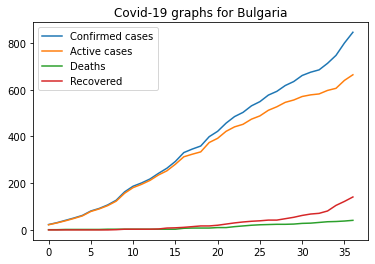

In [5]:
plt.plot(df['confirmed'], label = "Confirmed cases")
plt.plot(df['infected'], label = "Active cases")
#plt.plot(df['new'], label = "New cases")
plt.plot(df['deaths'], label = "Deaths")
plt.plot(df['recovered'], label = "Recovered")
plt.title("Covid-19 graphs for Bulgaria")
plt.legend()
plt.show()

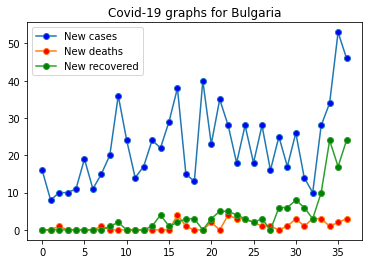

In [6]:
plt.plot(df['new'], label = "New cases",linestyle='solid',marker='o', markerfacecolor='blue')
plt.plot(df['new deaths'], label = "New deaths",linestyle='solid',marker='o', markerfacecolor='red')
plt.plot(df['new recovered'], label = "New recovered",linestyle='solid',marker='o', markerfacecolor='green')
plt.title("Covid-19 graphs for Bulgaria")
plt.legend()
plt.show()

In [7]:
reg = LinearRegression().fit([[el] for el in df.index], df['confirmed'])
#reg = LinearRegression().fit([[el] for el in df.index], df['deaths'])

In [8]:
df['prediction'] = reg.predict([[el] for el in df.index])

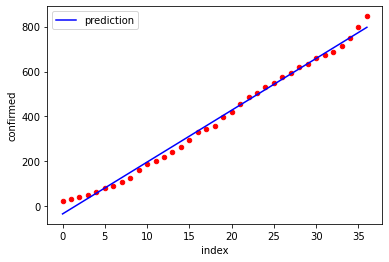

In [9]:
ax = plt.gca()
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', ax=ax)
#df.reset_index().plot(kind='scatter', x='index', y='deaths', color='red', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
plt.show()

In [10]:
x_next_5 = list(range(max(df.index) + 1, max(df.index) + 6))
next_5 = reg.predict([[el] for el in x_next_5])

In [11]:
next_5

array([819.87837838, 842.95163585, 866.02489331, 889.09815078,
       912.17140825])

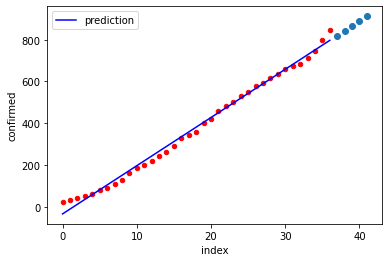

In [12]:
ax = plt.gca()
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', ax=ax)
#df.reset_index().plot(kind='scatter', x='index', y='deaths', color='red', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
ax.scatter(x=x_next_5, y=next_5)
plt.show()

In [13]:
#Trying to fit a logistic function to my data
def f(x, a, b, c, d):
    return a / (1. + np.exp(-(x - d)/c)) + b

In [14]:
a, c = 0, 0 #np.random.exponential(size=2)
b, d = 0, 0 #np.random.randn(2)

In [15]:
n = len(df['confirmed'])
#n = len(df['deaths'])
x = list(range(n))
y = df['confirmed']
#y = df['deaths']

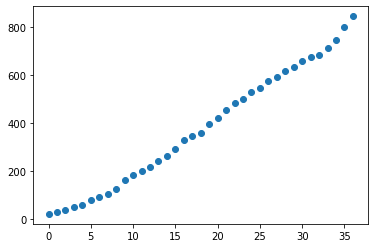

In [16]:
#plot of the data points 
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
plt.show()

In [17]:
#Obviously fitting a logistic function to the dataa points
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y)

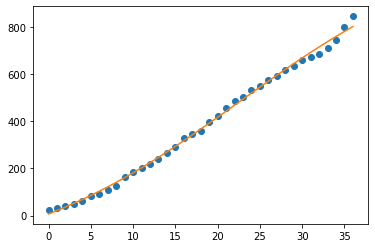

In [18]:
y_fit = f(x, a_, b_, c_, d_)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')
plt.show()

In [19]:
f([range(max(df.index) + 1, max(df.index) + 21)], a_, b_, c_, d_)

array([[ 822.13896779,  841.43508909,  860.02519463,  877.90058311,
         895.05686279,  911.49365769,  927.21428821,  942.22543455,
         956.53679105,  970.16071844,  983.1119002 ,  995.40700842,
        1007.0643833 , 1018.10372984, 1028.54583416, 1038.41230119,
        1047.72531496, 1056.50742163, 1064.78133552, 1072.56976742]])

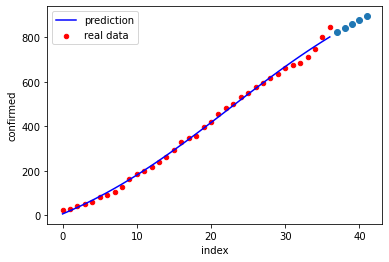

In [20]:
x_next_50 = list(range(max(df.index) + 1, max(df.index) + 6))
next_50 = f(x_next_50, a_, b_, c_, d_)
df['prediction'] = f([[el] for el in df.index], a_, b_, c_, d_)
ax = plt.gca()
#df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', label = 'jj', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', label = 'real data', ax=ax)
#df.reset_index().plot(kind='scatter', x='index', y='deaths', color='red', label = 'real data', ax=ax)
#scatter =
ax.scatter(x=x_next_50, y=next_50)
#legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
plt.show()

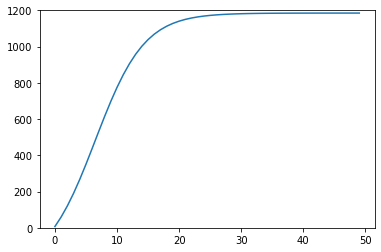

In [29]:
x = np.linspace(0,170)
plt.ylim(0,1200)
plt.plot(f(x,a_,b_,c_,d_,))
plt.show()

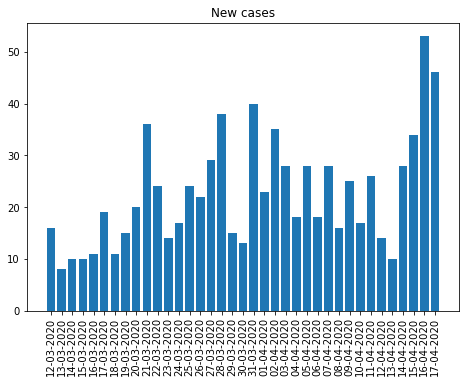

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dates = list(df['date'])
newCases = list(df['new'])
ax.bar(dates, newCases)
ax.set_title('New cases')
plt.xticks(rotation = 'vertical')
plt.show()